# Multiple Gap Filling Tool


### Original code of 

    Lucas-Moffat et al., 2022, "Multiple gap-filling for eddy covariance datasets", AgrForMet.

<font size="3"> This notebook will load the example data, run the gap-filling, and analyze the results. <br> Please cite the paper if using this code. </font>

## Check python environment

In [1]:
# Check python libraries
print("*** Check current environment ***")
import platform
print("platform os:", platform.system(), platform.release())
print("python:", platform.python_version(), "(incl. modules sys, datetime,shutil)")
import numpy
print("numpy:", numpy.__version__)
import pandas
print("pandas:", pandas.__version__)
import matplotlib
print("matplotlib:",matplotlib.__version__)
import decimal
print("decimal:",decimal.__version__)
import scipy
print("scipy:",scipy.__version__)

*** Check current environment ***
platform os: Darwin 21.4.0
python: 3.8.8 (incl. modules sys, datetime,shutil)
numpy: 1.20.3
pandas: 1.3.5
matplotlib: 3.5.0
decimal: 1.70
scipy: 1.7.3


## Import necessary libraries

In [2]:
#Import pandas for reading ini-file
import pandas as pd
#Import multiple gap filling package
import mgf
print("Version mgf:", mgf.__version__)

Version mgf: beta_20220812


## Load example data and settings

In [3]:
#Set file path and ini file name
file_path='./example/DE-BaF_tNr'
ini_name='tNr_BaF_2016_v03.ini'
# run_number = '202208112034' #Old run with results saved in example directory

#Print ini
pd.read_csv(file_path+'/'+ini_name, sep=',', encoding='latin1', index_col=['Variable'])

,Settings
Variable,
FluxGas,tNr
FluxColumn,Nr_F
FluxUnit,ng N m-2 s-1
FluxFlag,Nr_qc
FlagMax,1
...,...
DefGFT,MDA_hh5_hhs
FileData,tNr_BaF_v07_mgf.csv
FileModels,DE-BaF_tNr_ANN_v20191019.csv


## Run multiple gap-filling techniques (GFT)

In [4]:
#Fill artificial gaps of length 'hhs' and 'days' with multiple techniques for the whole dataset
run_number = mgf.mgf.run_GFT(ini_name, file_path)

Directory created: ./example/DE-BaF_tNr/202208121237
*** Loaded ini: ./example/DE-BaF_tNr/tNr_BaF_2016_v03.ini
*** Fill gaps for: tNr_BaF_v07_mgf.csv with 3792 data rows which equals 79.0 days. ***
Checks: Time stamps are unique: True
Checks: Length of time stamps are a multiple of complete days: True
Checks: First day starts at first half-hour (Fluxnet convention 0:30): True
Checks: Last day ends at mid night (Fluxnet convention 0:00 next day): True
Checks: Time stamps consist of continuous half-hours: True
Checks: Name of new to be filled column FluX_tNr is unique: True
New column created with fluxes to fill for FluX_tNr with flagging ( Nr_qc <= 1 )
Checks: Longest gap in fluxes is smaller than ten days: True (Max gap size: 103 hhs)
Directory created: ./example/DE-BaF_tNr/202208121237/_in
Directory created: ./example/DE-BaF_tNr/202208121237/_mgf
Directory created: ./example/DE-BaF_tNr/202208121237/_res
Directory created: ./example/DE-BaF_tNr/202208121237/_plots
*** Original data file

## Inspect the filled fluxes

*** Loaded ini: ./example/DE-BaF_tNr/./202208121237/_mgf/ini_202208121237.ini
*** Loaded results of GFT scenarios for : ['IP_lin_hhs' 'IP_mov_hhs' 'WDM_hhs' 'FDA_hh6_hhs' 'MDA_hh5_hhs'
 'MDC_d3_hhs' 'MDC_d7_hhs' 'LUT_V1_d3_hhs' 'LUT_V1_d7_hhs'
 'LUT_V1V2_d3_hhs' 'LUT_V1V2_d7_hhs' 'LUT_V1V2V3_d3_hhs'
 'LUT_V1V2V3_d7_hhs' 'LUT_MDS_d7_hhs']
Checks: Timestamps of model file equal time stamps of data file: True
*** Loaded model results with columns: ['ANN_CRU_hhs' 'ANN_all_hhs' 'ANN_CRU_days' 'ANN_all_days']
*** Results saved to _mgf/mgf_Models_tNr_202208121237.csv
*** Results saved to _res/mgf_FilledReal_tNr_202208121237.csv
*** Results saved to _mgf/mgf_AllData_tNr_202208121237.csv
*** All data (fluxes, models, scenarios, filled real gaps) saved ***
*** Results saved to _res/descr_tNr_202208121237_ini.csv


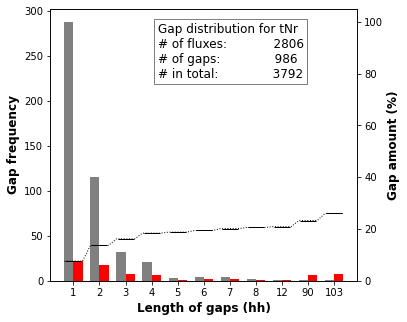

Plot saved to: _plots/pgd_tNr_202208121237_real.pdf


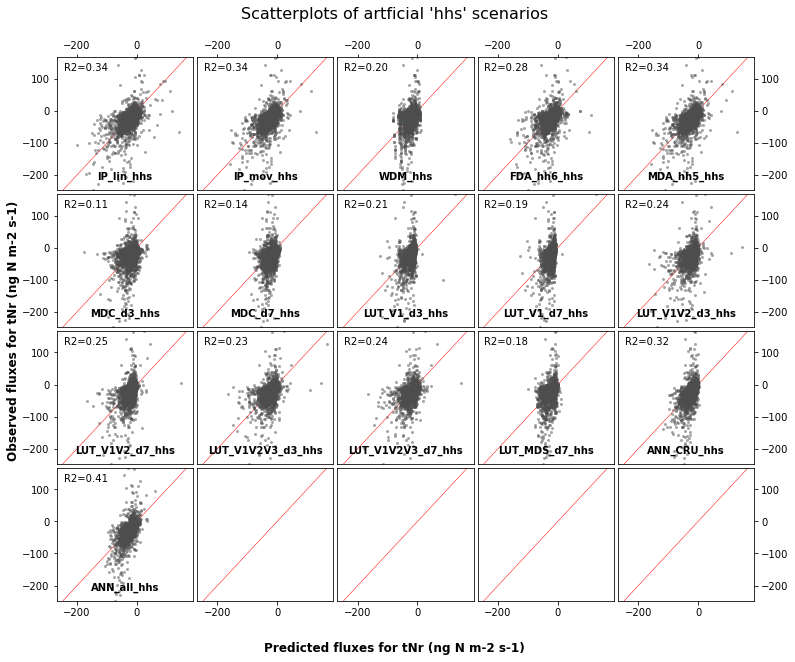

Plot saved to: _plots/psc_tNr_202208121237_hhs.pdf


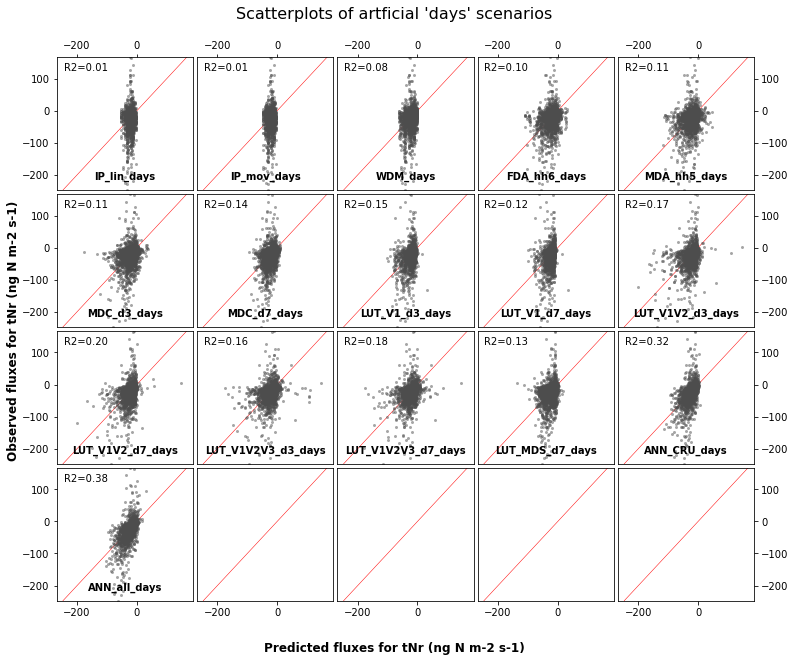

Plot saved to: _plots/psc_tNr_202208121237_days.pdf


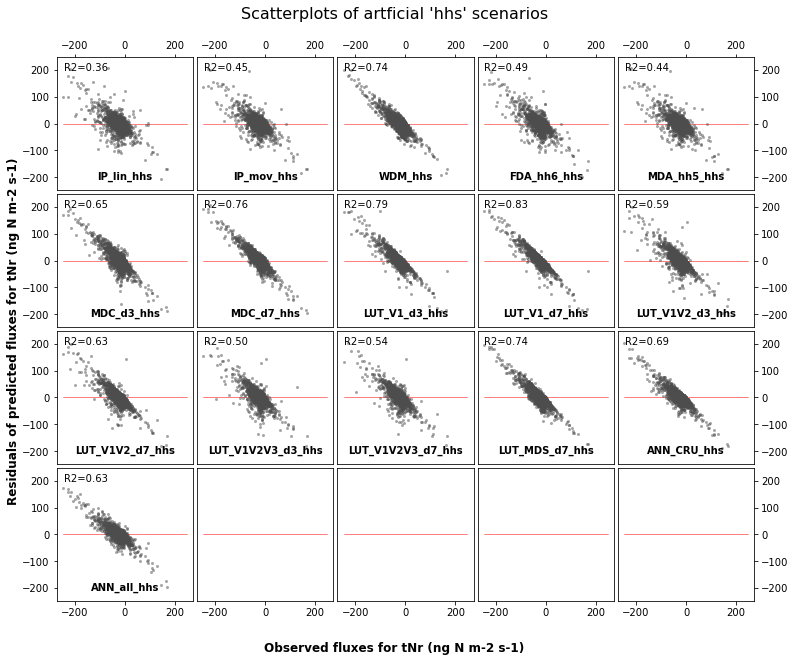

Plot saved to: _plots/psc_tNr_202208121237_hhs_resid.pdf


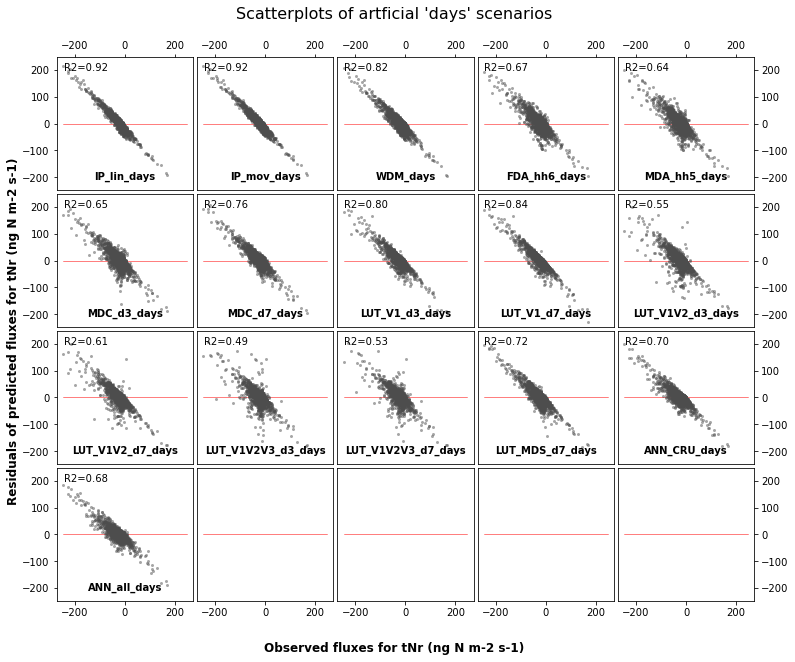

Plot saved to: _plots/psc_tNr_202208121237_days_resid.pdf


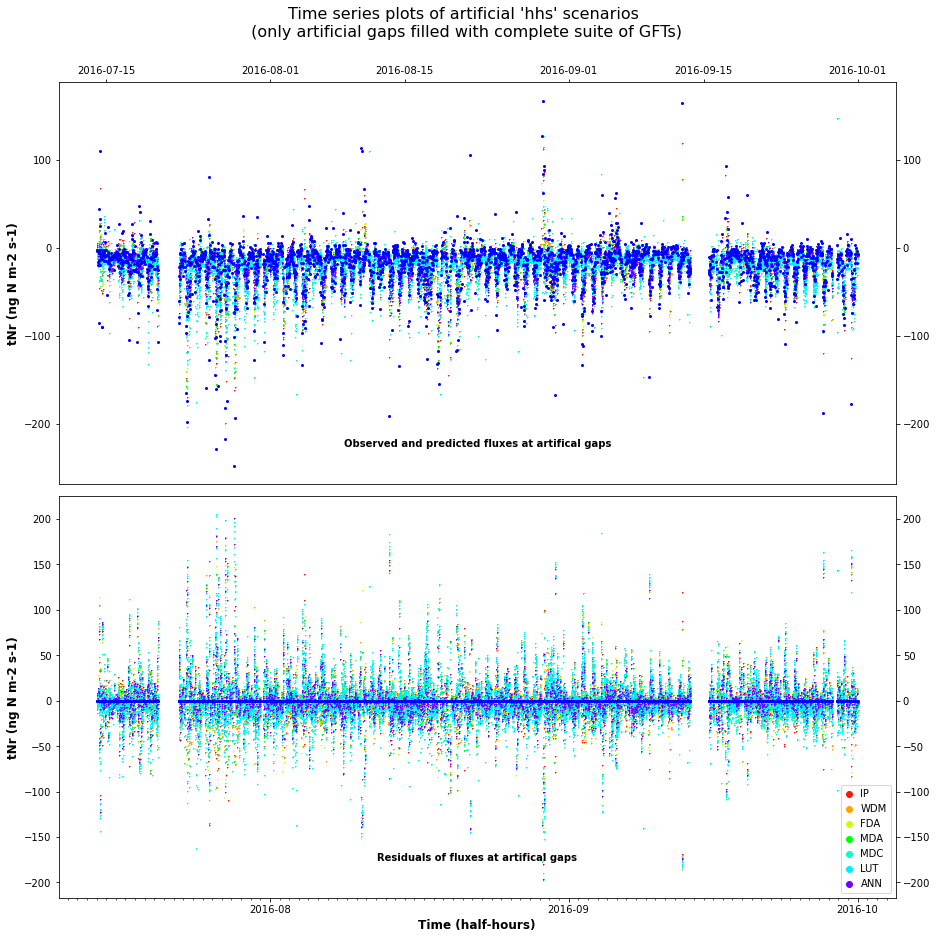

Plot saved to: _plots/pts_tNr_202208121237_fluxes_cplt_hhs.pdf


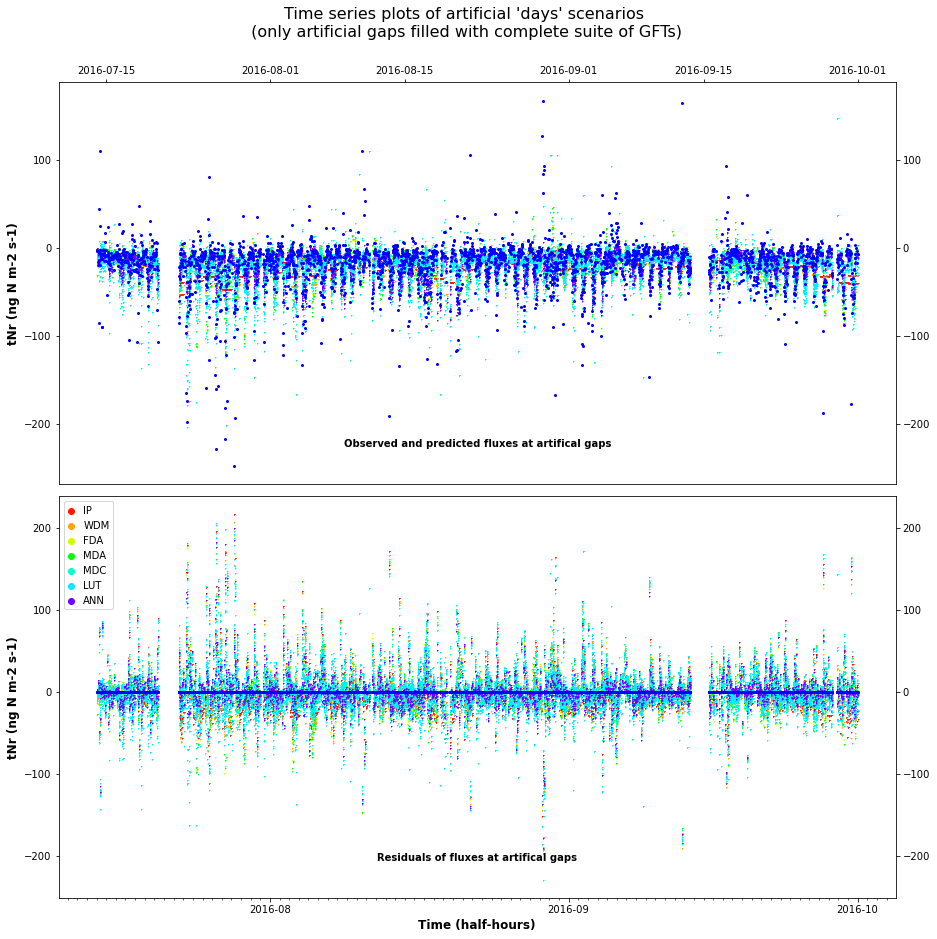

Plot saved to: _plots/pts_tNr_202208121237_fluxes_cplt_days.pdf


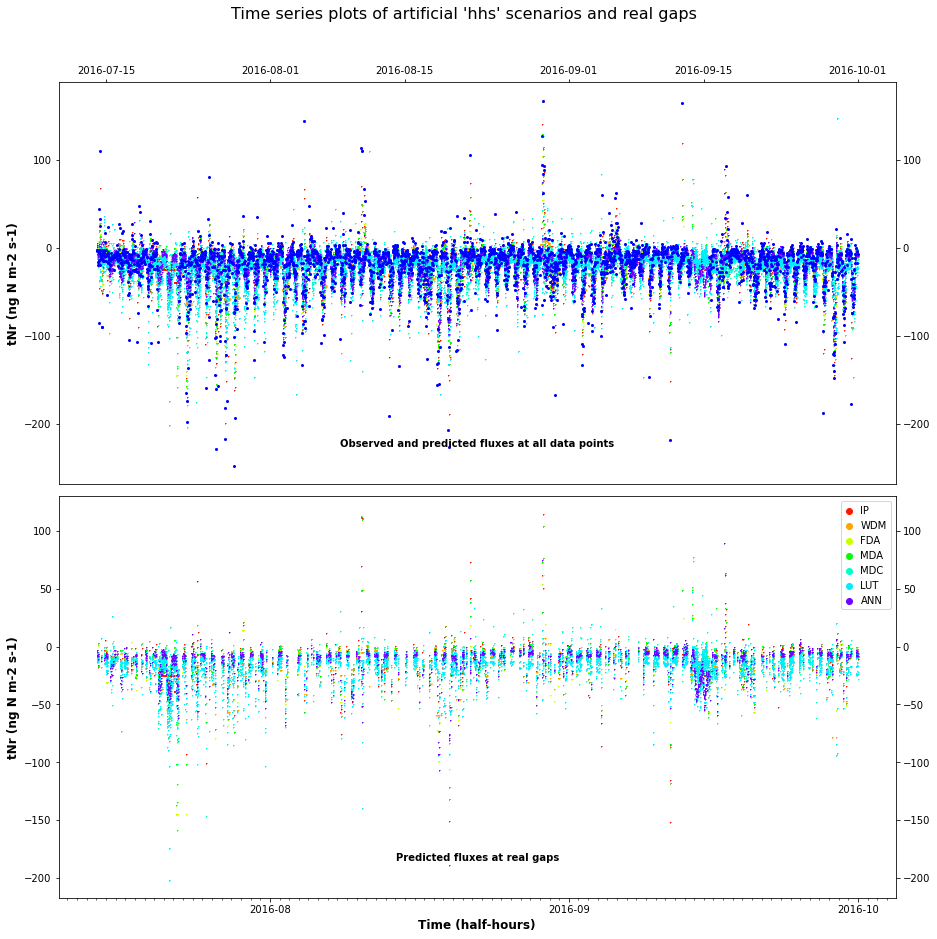

Plot saved to: _plots/pts_tNr_202208121237_fluxes_real_hhs.pdf


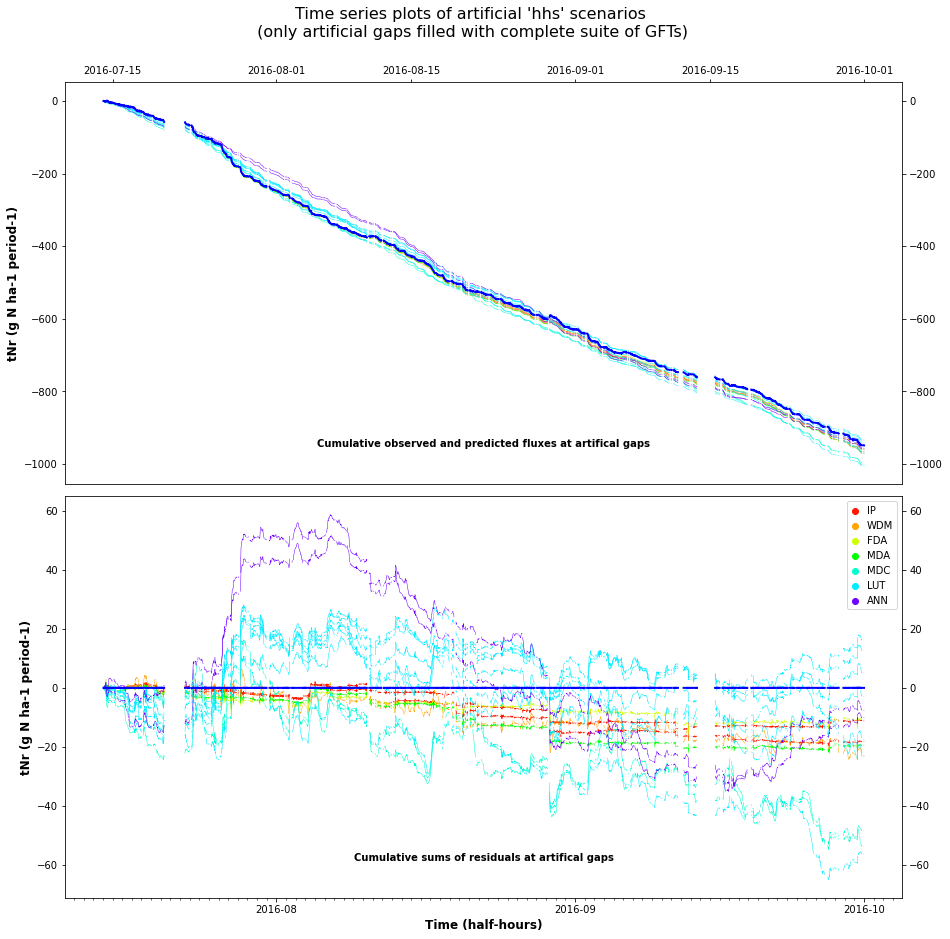

Plot saved to: _plots/pts_tNr_202208121237_cums_cplt_hhs.pdf


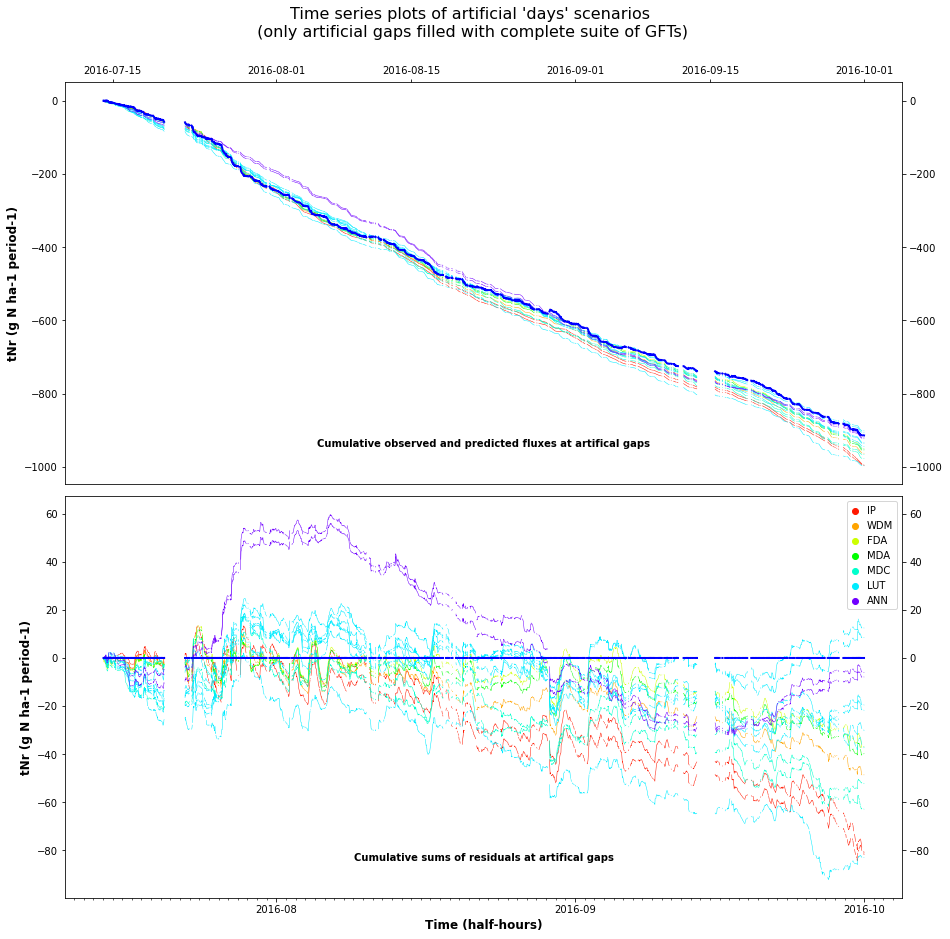

Plot saved to: _plots/pts_tNr_202208121237_cums_cplt_days.pdf


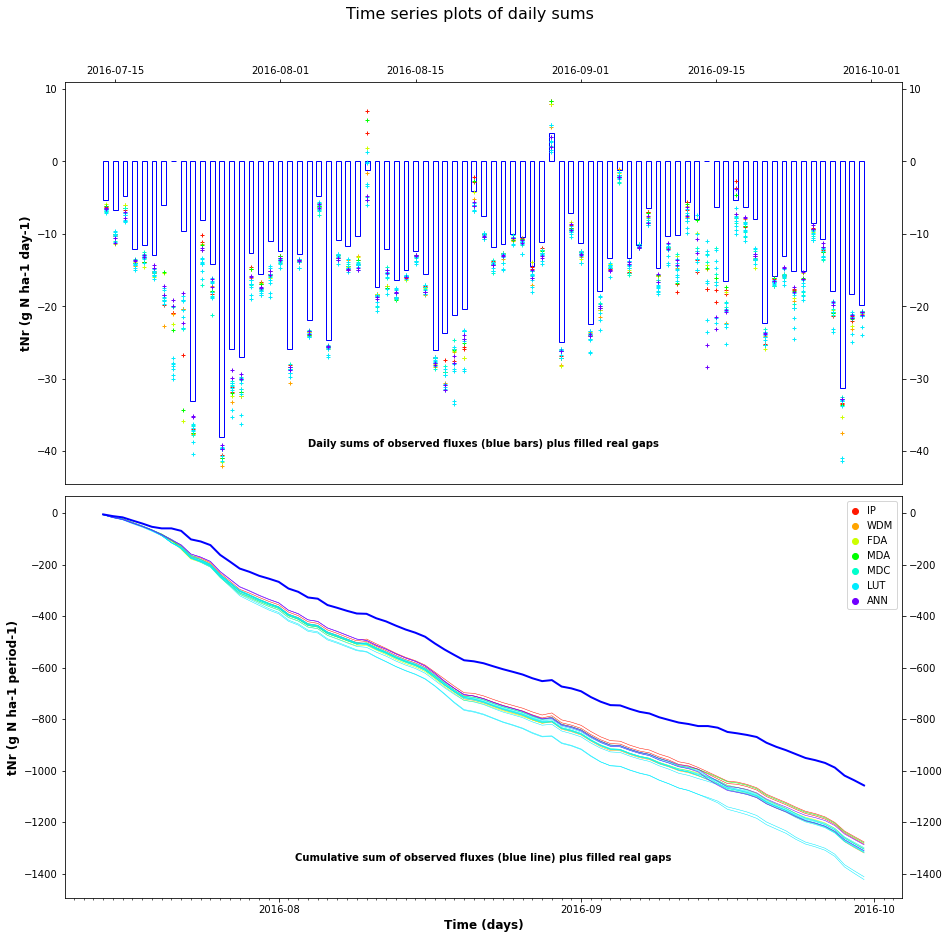

Plot saved to: _plots/pds_tNr_202208121237_daily_real.pdf


In [5]:
### Load GFT results and (if available) model data, fill real gaps, save and plot results
mgf.mgf.inspect_FF(file_path, run_number)

## Bootstrap scenarios from the filled fluxes

In [6]:
#Bootstrap 999 'hhs' scenarios and 999 'days' scenario to evaluate the performances of the GFT¶
mgf.mgf.bootstrap_FF(file_path, run_number)

*** Loaded ini: ./example/DE-BaF_tNr/./202208121237/_mgf/ini_202208121237.ini
*** Loaded all data (fluxes, meteo, models, scenarios, filled real gaps) for run tNr 202208121237
>>> Bootstrapping full-time:
>>> Number of artificial gaps used for bootstrapping ' hhs ': 2688
*! Missing artificial gaps due to (partially) incomplete techniques: 118
>>> Settings for bootstrapping: repetitions = 999 , percent of data = 50 , seed = 99
IP_lin_hhs 999 50 , Bias: -0.26 0.68 , SDev: 20.88 0.75 , R2: 0.34 0.04
IP_mov_hhs 999 50 , Bias: -0.40 0.66 , SDev: 19.98 0.73 , R2: 0.35 0.03
WDM_hhs 999 50 , Bias: -0.52 0.69 , SDev: 23.09 0.79 , R2: 0.18 0.02
FDA_hh6_hhs 999 50 , Bias: -0.25 0.68 , SDev: 21.67 0.77 , R2: 0.27 0.03
MDA_hh5_hhs 999 50 , Bias: -0.43 0.66 , SDev: 20.14 0.73 , R2: 0.34 0.03
MDC_d3_hhs 999 50 , Bias: -1.15 0.75 , SDev: 25.86 0.82 , R2: 0.12 0.02
MDC_d7_hhs 999 50 , Bias: -1.05 0.70 , SDev: 23.67 0.80 , R2: 0.15 0.02
LUT_V1_d3_hhs 999 50 , Bias: -0.41 0.67 , SDev: 22.84 0.74 , R2: 0.

## Analyse bootstrap results

*** Loaded ini: ./example/DE-BaF_tNr/./202208121237/_mgf/ini_202208121237.ini
*** Loaded bootstrap results of tNr 202208121237 ft_hhs
*** Loaded bootstrap results of tNr 202208121237 ft_days
*** Loaded bootstrap results of tNr 202208121237 dt_hhs
*** Loaded bootstrap results of tNr 202208121237 dt_days
*** Loaded bootstrap results of tNr 202208121237 nt_hhs
*** Loaded bootstrap results of tNr 202208121237 nt_days


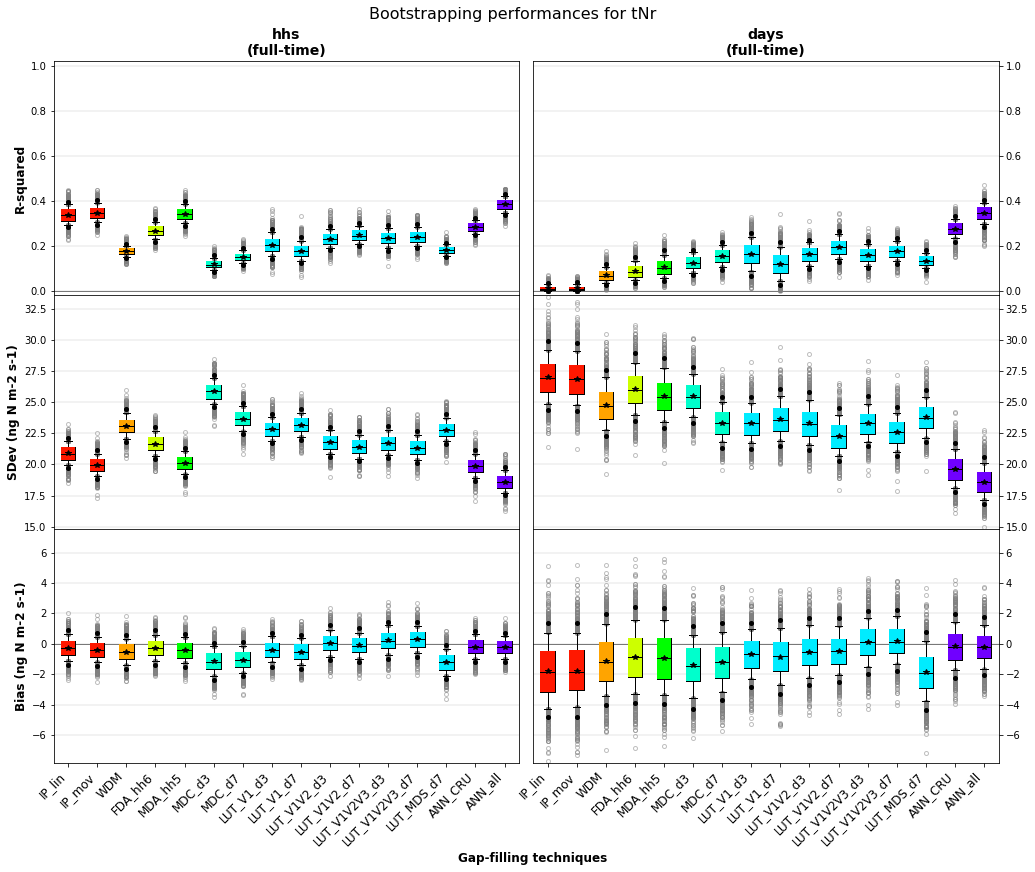

Plot saved to: _plots/pba_tNr_202208121237_double_both_ft.pdf


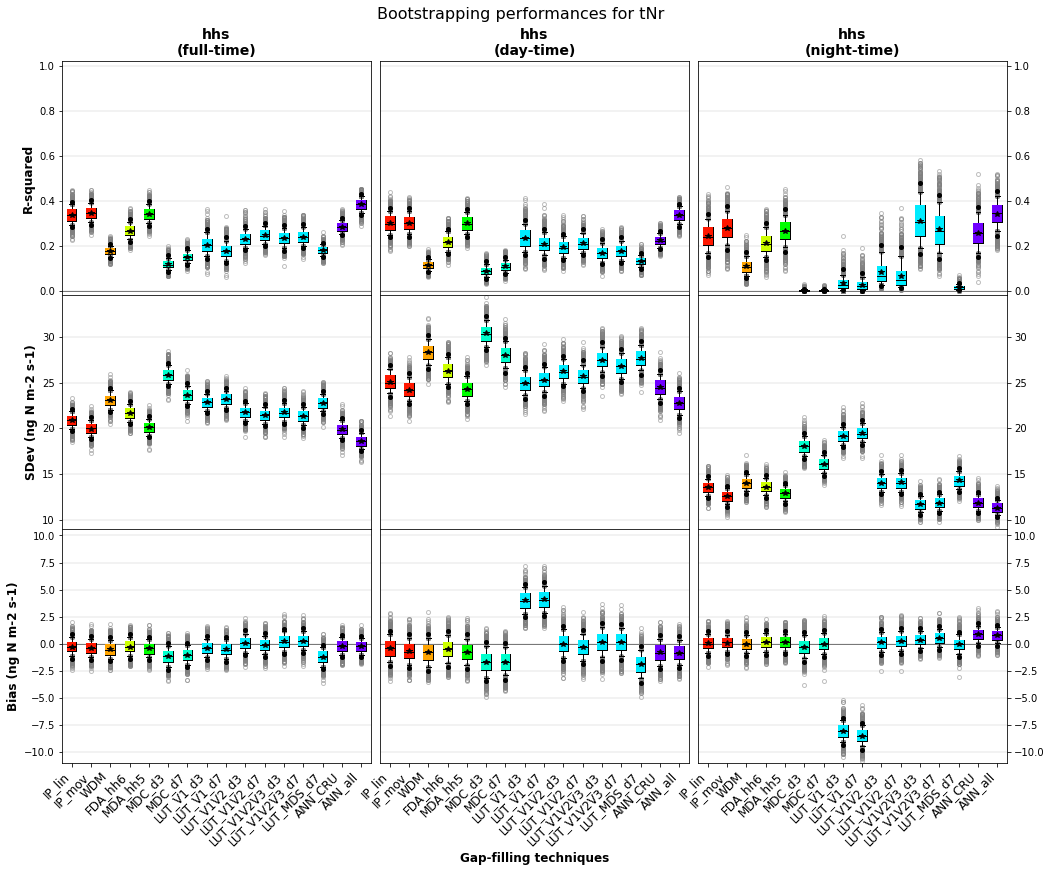

Plot saved to: _plots/pba_tNr_202208121237_triple_hhs_fdn.pdf


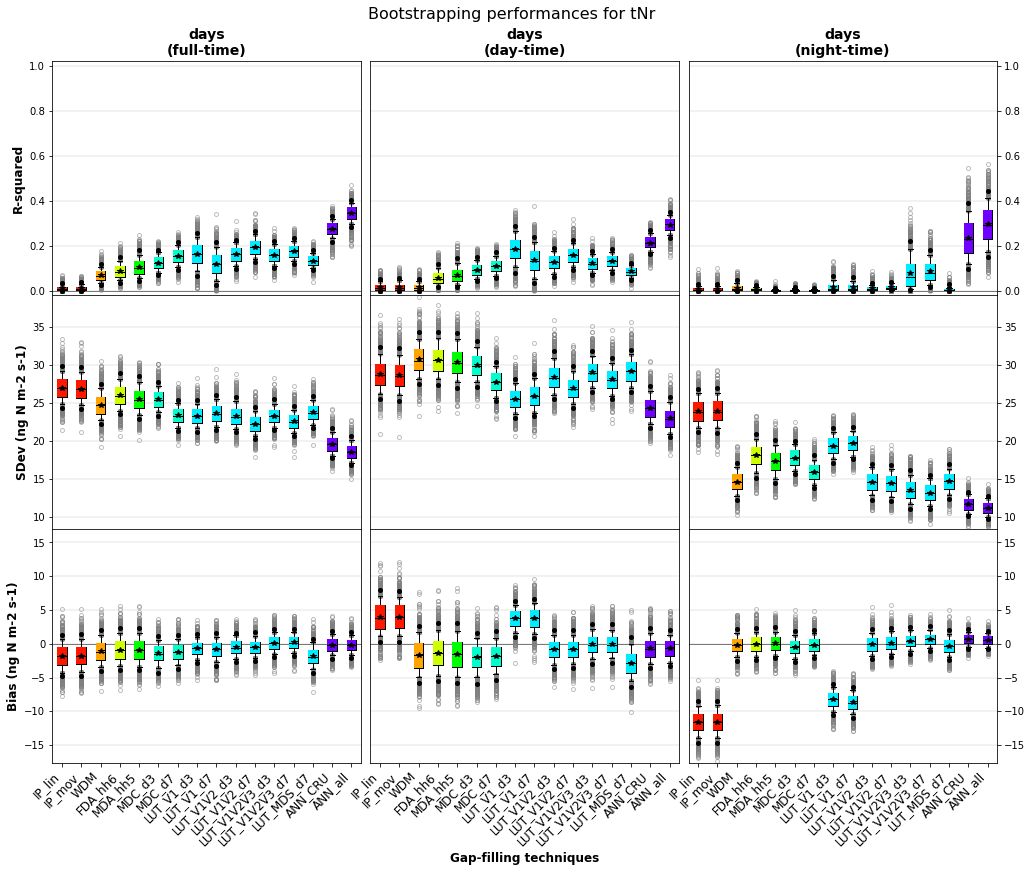

Plot saved to: _plots/pba_tNr_202208121237_triple_days_fdn.pdf
*** Results saved to _mgf/berr_tNr_202208121237_ft.csv
*** Results saved to _mgf/berr_tNr_202208121237_dt.csv
*** Results saved to _mgf/berr_tNr_202208121237_nt.csv
*** Results saved to _res/errors_tNr_202208121237.csv
*** Loaded all data (fluxes, meteo, models, scenarios, filled real gaps) for run tNr 202208121237
*** Results saved to _res/sums_tNr_202208121237_all.csv


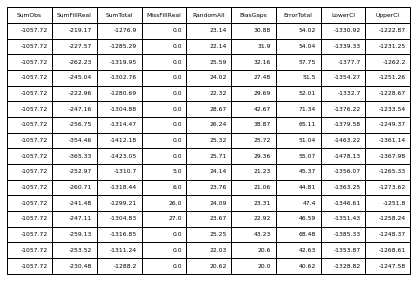

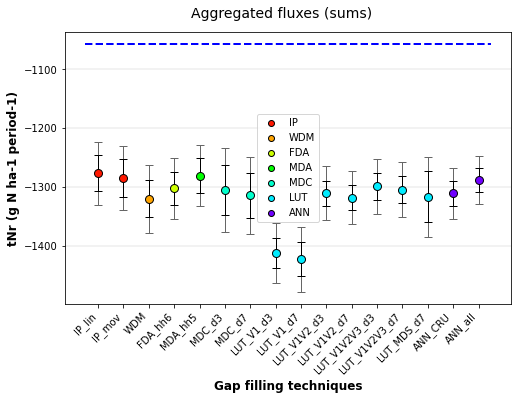

Plot saved to: _plots/pse_tNr_202208121237_real.pdf


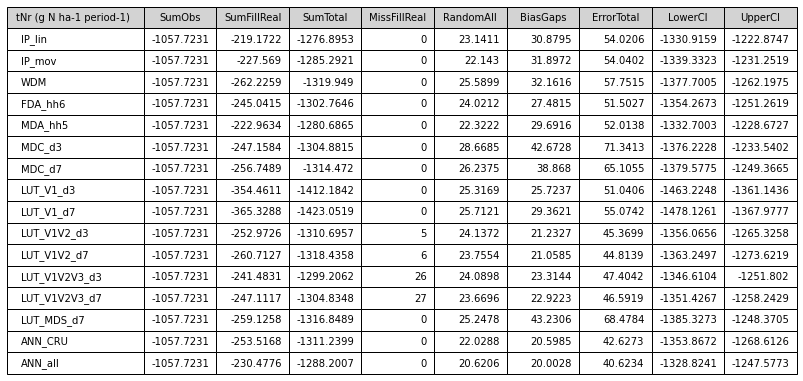

Plot saved to: _res/sums_tNr_202208121237_all.pdf


In [7]:
# Plot results, calculate sums and errors
mgf.mgf.analyse_BS(file_path, run_number)

## Pick emsemble

*** Loaded ini: ./example/DE-BaF_tNr/./202208121237/_mgf/ini_202208121237.ini
*** Loaded all data (fluxes, meteo, models, scenarios, filled real gaps) for run tNr 202208121237
*** Loaded bootstrap error estimates for run tNr 202208121237
*** Results saved to _res/sums_tNr_202208121237_ens.csv


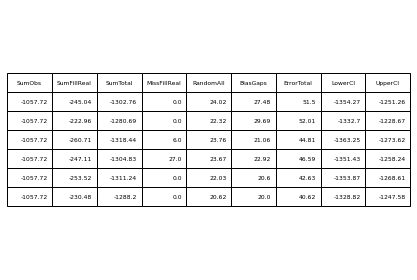

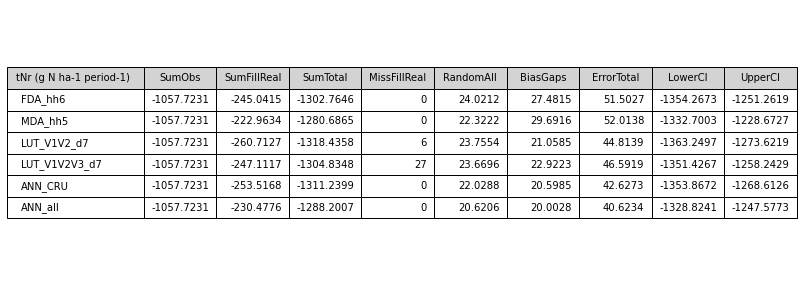

Plot saved to: _res/sums_tNr_202208121237_ens.pdf
*** Results saved to _res/res_tNr_202208121237_ens.csv


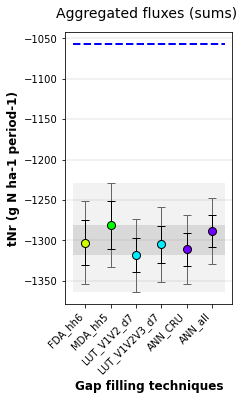

Plot saved to: _plots/pse_tNr_202208121237_real_ens.pdf


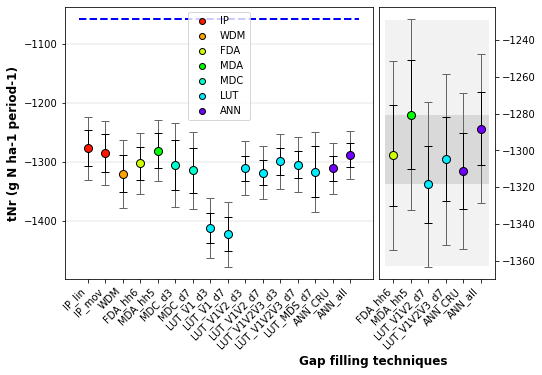

Plot saved to: _plots/pse_tNr_202208121237_double_real_ens.pdf


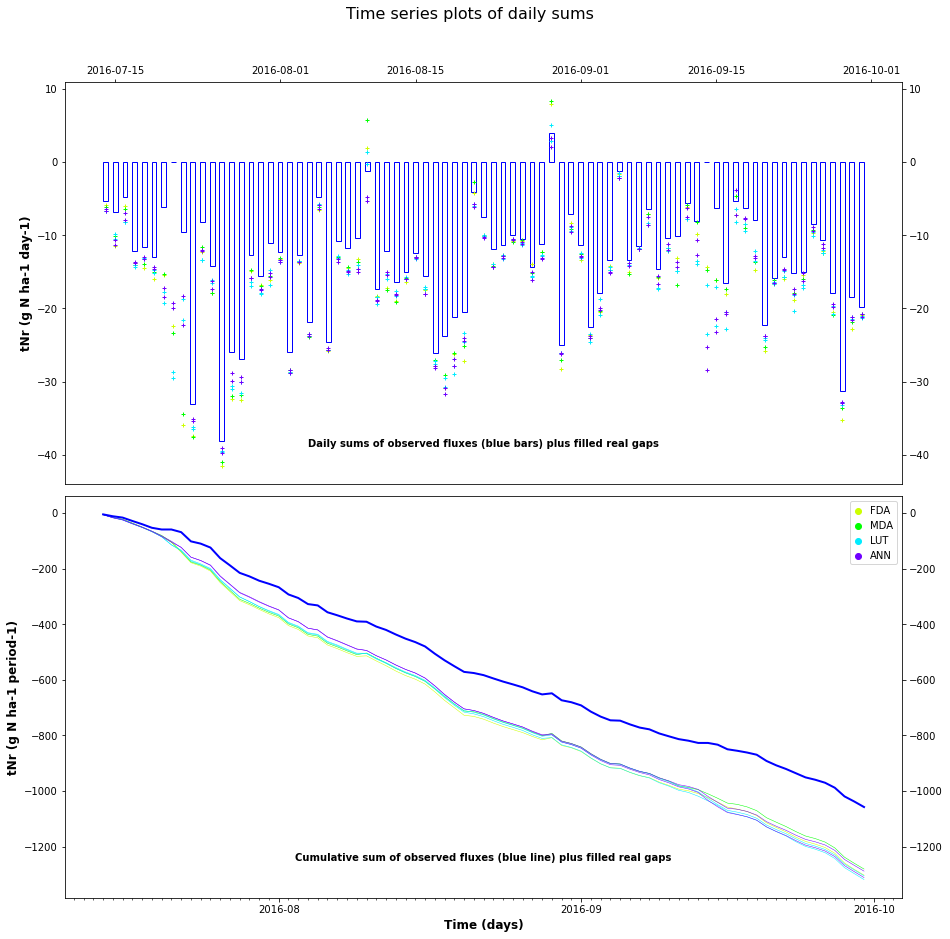

Plot saved to: _plots/pds_tNr_202208121237_daily_real_ens.pdf


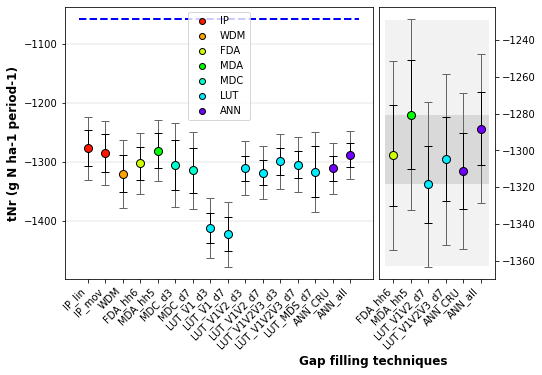

Plot saved to: _plots/pse_tNr_202208121237_double_real_ens_ms.pdf


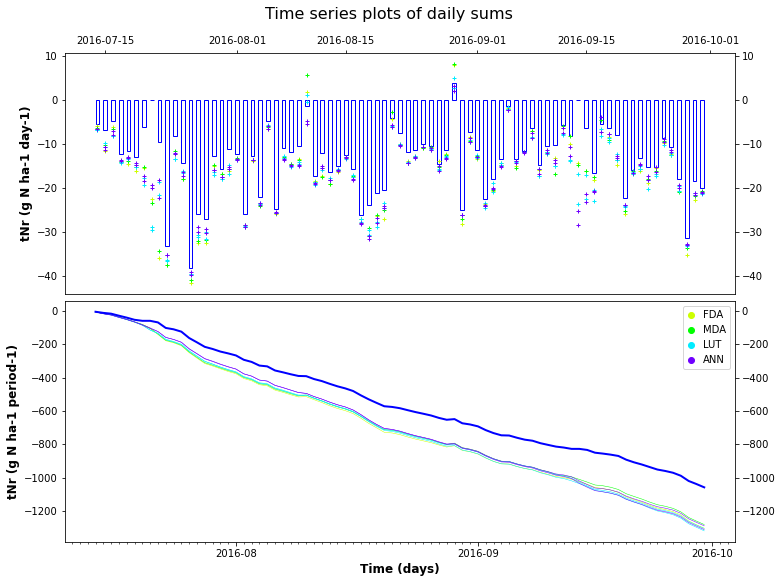

Plot saved to: _plots/pds_tNr_202208121237_daily_real_ens_ms.pdf
*** Ensemble results of the aggregated fluxes: EnsStats
UpperCI    -1228.7
UpperUnc      52.0
UpperTot   -1280.7
Delta         37.7
LowerTot   -1318.4
LowerUnc     -44.8
LowerCI    -1363.2
TotalCI      134.6
Name: tNr (g N ha-1 period-1), dtype: float64


In [8]:
#Set GFT to be used for the ensemble results
good_GFTs = 'FDA_hh6|MDA_hh5|LUT_V1V2_d7|LUT_V1V2V3_d7|ANN_CRU|ANN_all'

# Plot ensemble results
mgf.mgf.pick_GE(file_path, run_number, good_GFTs)

In [9]:
# Beep when finished (works on OS X)
import os
os.system("printf '\a'") # or '\7'



0